Confusion Matrix:
[[ 86517  10761]
 [  4521 392222]]

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.89      0.92     97278
           1       0.97      0.99      0.98    396743

    accuracy                           0.97    494021
   macro avg       0.96      0.94      0.95    494021
weighted avg       0.97      0.97      0.97    494021


ROC-AUC Score:
0.9389918036816655


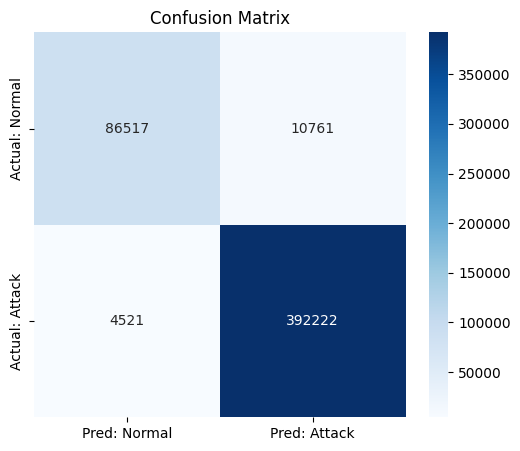

✅ Isolation Forest model trained and saved.


In [1]:
# 03_Model_IsolationForest.ipynb - CyberSentinel Anomaly Detection

import pandas as pd
import numpy as np
from sklearn.ensemble import IsolationForest
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

# Load processed data
X_train = pd.read_csv("../data/processed/X_train_scaled.csv")
X_all = pd.read_csv("../data/processed/X_all_scaled.csv")
y_all = pd.read_csv("../data/processed/y_all.csv")

# Train Isolation Forest
model = IsolationForest(n_estimators=100, contamination='auto', random_state=42)
model.fit(X_train)

# Predict on full dataset
y_pred = model.predict(X_all)

# Convert predictions: 1 -> normal (0), -1 -> anomaly (1)
y_pred_binary = np.where(y_pred == 1, 0, 1)

# Evaluation
print("Confusion Matrix:")
print(confusion_matrix(y_all, y_pred_binary))

print("\nClassification Report:")
print(classification_report(y_all, y_pred_binary))

print("\nROC-AUC Score:")
print(roc_auc_score(y_all, y_pred_binary))

# Confusion Matrix Plot
plt.figure(figsize=(6, 5))
sns.heatmap(confusion_matrix(y_all, y_pred_binary), annot=True, fmt='d', cmap='Blues',
            xticklabels=['Pred: Normal', 'Pred: Attack'],
            yticklabels=['Actual: Normal', 'Actual: Attack'])
plt.title("Confusion Matrix")
plt.show()

# Save the model
joblib.dump(model, "../models/isolation_forest_model.pkl")
print("✅ Isolation Forest model trained and saved.")
